In [1]:
'''Problem statement:
Perform clustering for the crime data and identify the number of clustersformed and draw inferences. Refer to crime data.csv dataset.

1. Business Problem

1.1. What is the business objective?
Crime Pattern Identification: Group states with similar crime rates to identify regional patterns or trends, which could help in allocating resources or targeting interventions.
Safety Indexing: Cluster states into groups based on safety levels (e.g., high-crime vs. low-crime states) for use in policy-making or public awareness campaigns.
Resource Allocation: Identify clusters of states with similar crime profiles to optimize the allocation of law enforcement resources.
Urbanization Impact Analysis: Analyze how the percentage of the urban population correlates with different crime rates by clustering states based on these factors.
Policy Effectiveness Evaluation: Group states to compare the effectiveness of different crime prevention policies across similar clusters.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("crime_data.csv") #Load the dataset

In [3]:
df.head() #View data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#check the shape of dataset
df.shape

(50, 5)

In [5]:
df.describe() #Get statistical summary

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
#checking the datatype
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
df.shape

(50, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
#data Wrangling
#Check for Nan values
null=df.isnull().sum()
null
print("number of NaN values for the column bedrooms:",df.isnull().sum())

number of NaN values for the column bedrooms: Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


<Axes: >

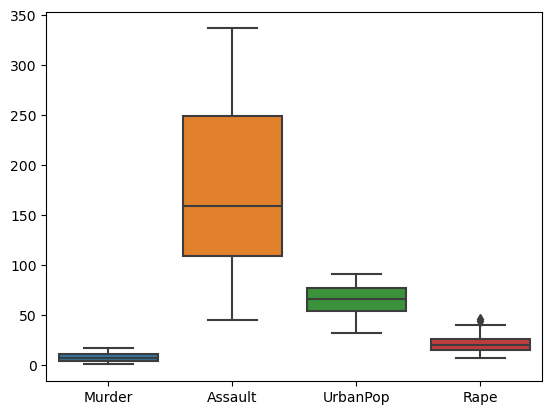

In [11]:
#Determine outliers

sns.boxplot (df)

In [12]:
#Boxplot shows 'Rape' column has outliers the data variation is a lot

<Axes: >

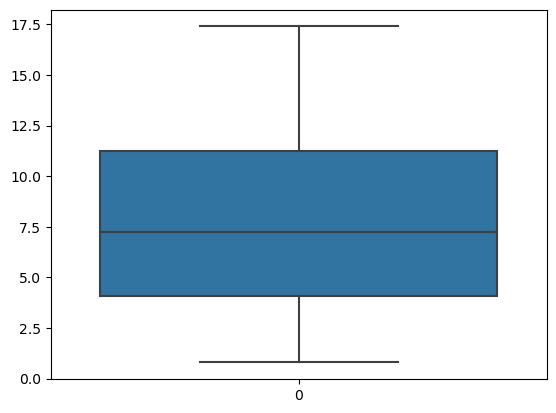

In [13]:
sns.boxplot (df['Murder']) #There is no outlier

<Axes: >

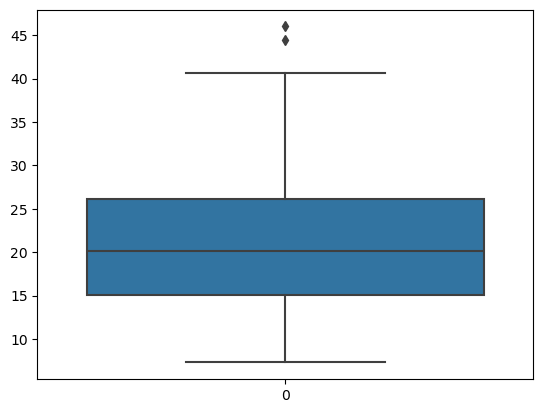

In [14]:
sns.boxplot(df['Rape'])#outlier detected

<function matplotlib.pyplot.show(close=None, block=None)>

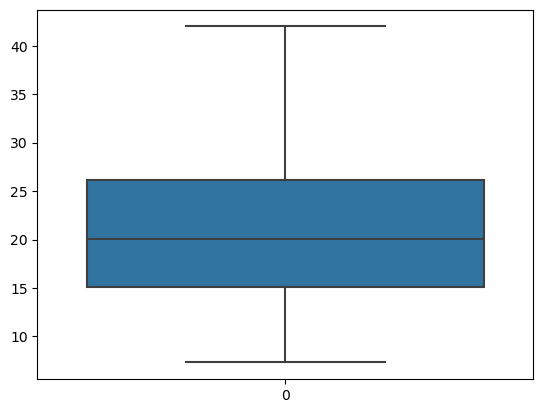

In [95]:
# Replace the outliers by median imputation

for i in df['Rape']:
    q1=df['Rape'].quantile(0.25)
    q3=df['Rape'].quantile(0.75)
    iqr=q3-q1

    Lower_tail= q1-1.5*iqr
    Upper_tail= q3+1.5*iqr
    if i> Upper_tail or i< Lower_tail:
        df['Rape']=df['Rape'].replace(i,np.median(df['Rape']))
sns.boxplot(df['Rape'])    
plt.show

In [97]:
 #Rename columns
df.rename({'Unnamed: 0': 'Name'}, axis=1,inplace=True)

In [99]:
df.columns

Index(['Name', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'cluster_id'], dtype='object')

In [101]:
df.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,42.0,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [19]:
# standardization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:,1:])
df_s=pd.DataFrame(x_scaled)
df_s.columns=['Murder','Assault','UrbanPop','Rape']
df_s = pd.concat([df['Name'],df_s],axis=1)
df_s.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [20]:
#normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df.iloc[:,1:])
df_n=pd.DataFrame(x_scaled)
df_n.columns=['Murder','Assault','UrbanPop','Rape']

df_n = pd.concat([df['Name'],df_n],axis=1)
df_n.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


In [21]:
df_vis = df_n

In [22]:

from sklearn import preprocessing                  #transformations of categorical data using LabelEncoder

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
df_vis['Name_id'] = le.fit_transform(df_vis['Name'])

In [25]:
df_vis.drop(['Name'],axis=1,inplace = True)
df_vis.head()

,Murder,Assault,UrbanPop,Rape,Name_id
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,2
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,4


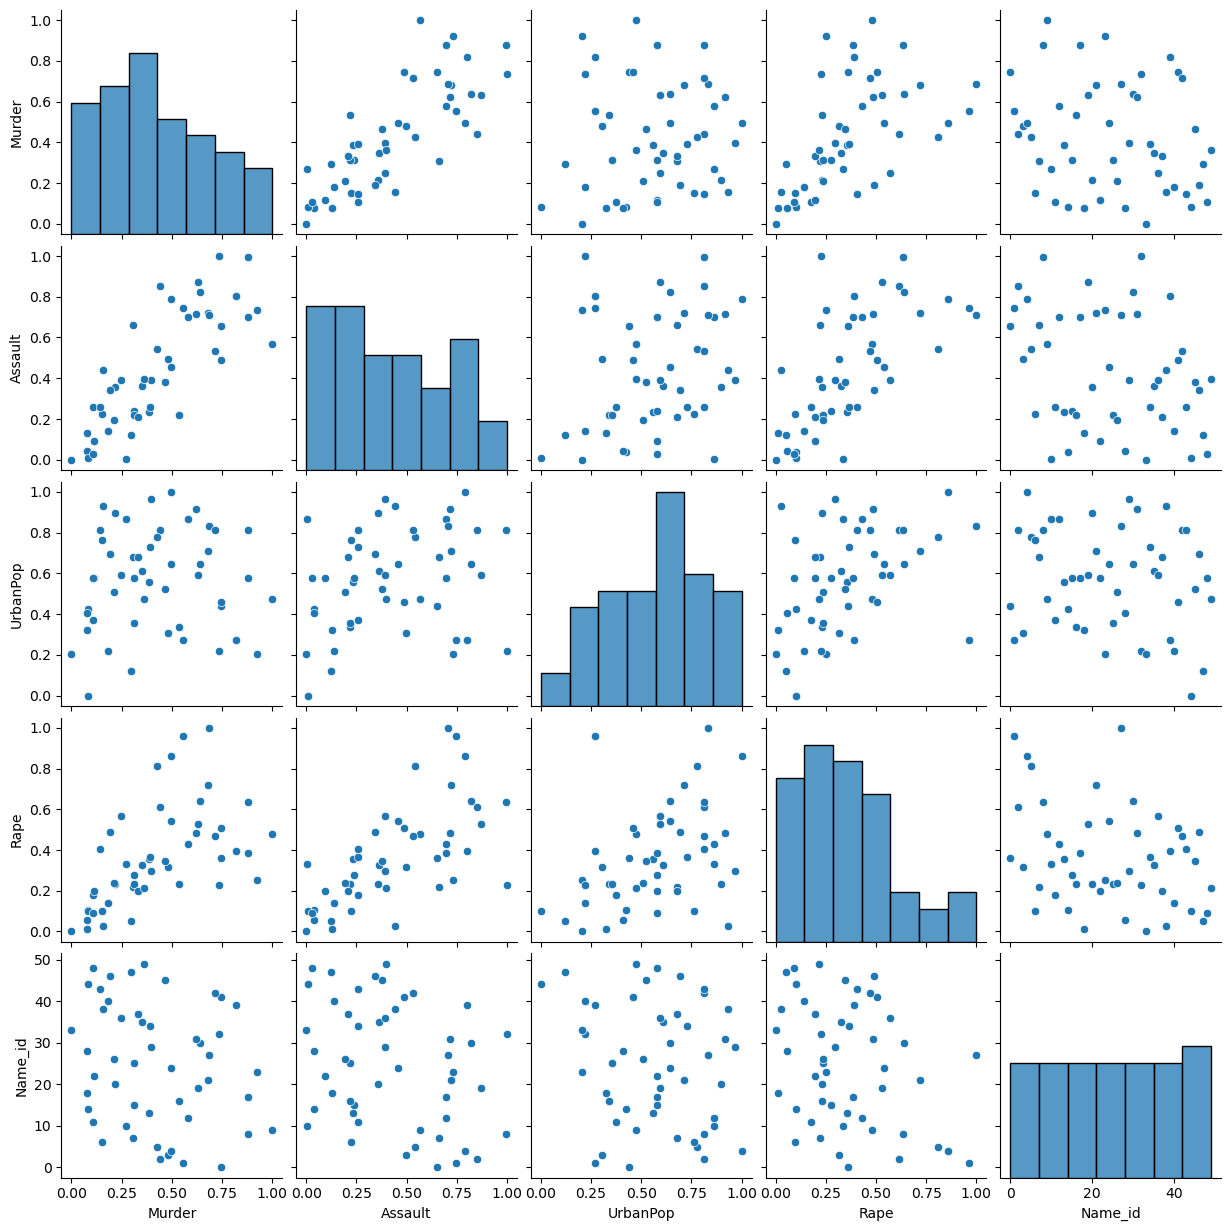

In [26]:
import seaborn as sns
#pal = sns.color_palette('Set2')
sns.pairplot(df_vis)

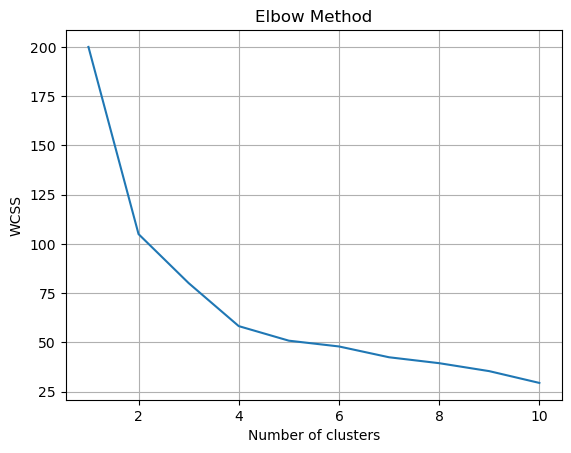

In [27]:
#WCSS (finding optimum number of clusters) 
#for standardized data

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_s.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
#very slight change in WCSS value from k = 4 to 5 as compared to k = 1 to 2
#hence k = 4

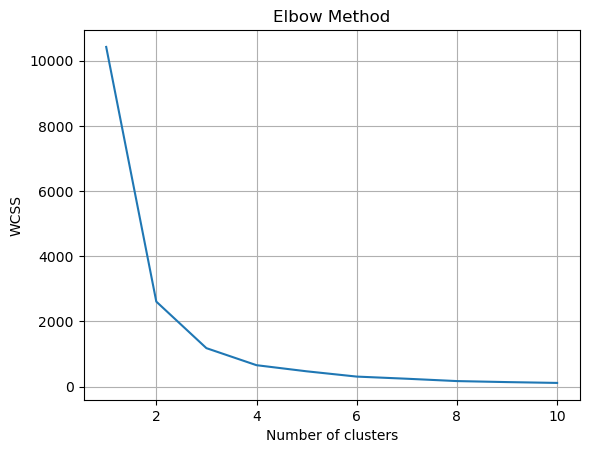

In [28]:
#For Normalised Data
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_n.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [29]:
#very slight change in WCSS value from k = 4 to 5 as compared to k = 1 to 2
#hence k = 4



In [30]:
#Building cluster (K-means square)
from sklearn.cluster import KMeans
model = KMeans(4, random_state=42)
model.fit(df_s.iloc[:,1:])

KMeans(n_clusters=4, random_state=42)

In [31]:
model.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [32]:
#Assign clusters to the standardized set
df_s['cluster_id'] = model.labels_
df_s.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,1
1,Alaska,0.513019,1.118060,-1.224067,2.509424,2
2,Arizona,0.072361,1.493817,1.009122,1.053466,2
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,1
4,California,0.281093,1.275635,1.776781,2.088814,2


In [33]:

model.cluster_centers_     

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.44878894, -0.35858791,  0.56576856, -0.20455729]])

In [34]:
#Assign clusters to the data set
df['cluster_id'] = model.labels_
df.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


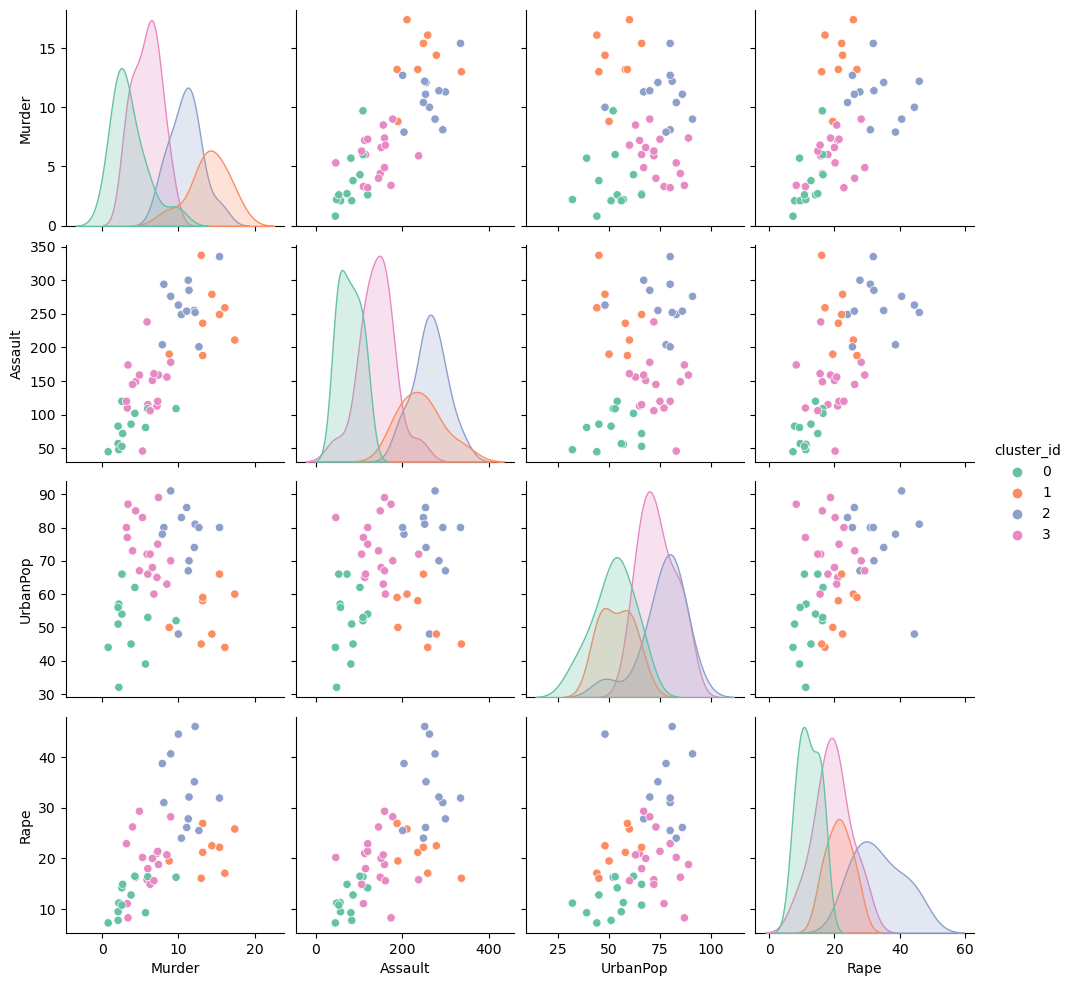

In [35]:
import seaborn as sns
#pal = sns.color_palette("tab")

sns.pairplot(df, 
             palette=sns.color_palette("Set2")[:4],   #[:4] bcoz our color palette has many colors but we need 4 color for 4 clusters 
             hue = 'cluster_id'                        #two different color according cluster_id    
            )

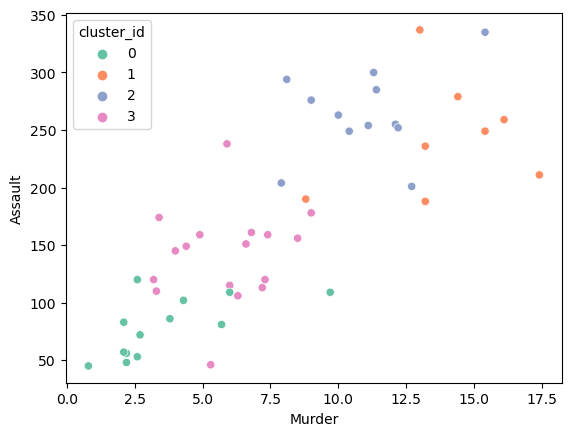

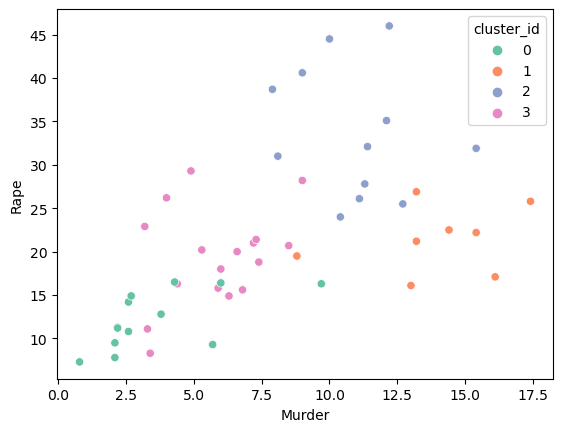

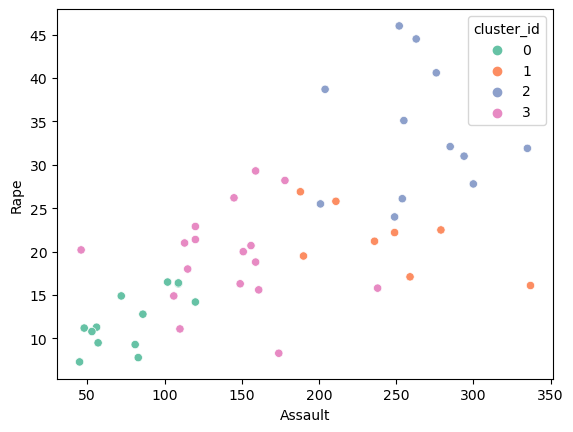

In [36]:
import seaborn as sns

sns.scatterplot(x='Murder', y='Assault', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])                 
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])              
plt.show()

In [37]:
#****************************inferences from the clusters ******************************

#cities belongs to cluster_id = 0 has lowest murder, assault and rape rate
#cities belongs to cluster_id = 2 has slightly higher murder, assault and rape rate than cities belongs to cluster_id = 0
#cities belongs to cluster_id = 1 and 3 has highest crime rate




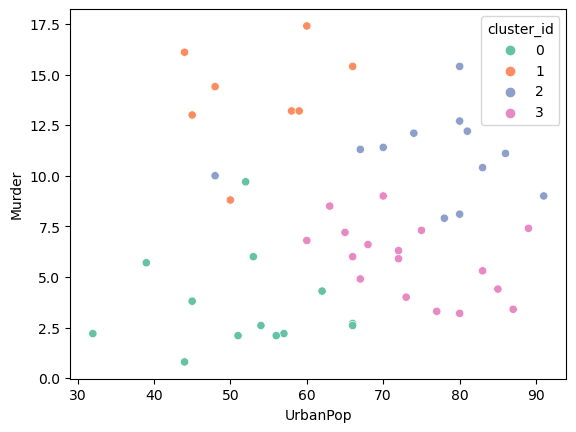

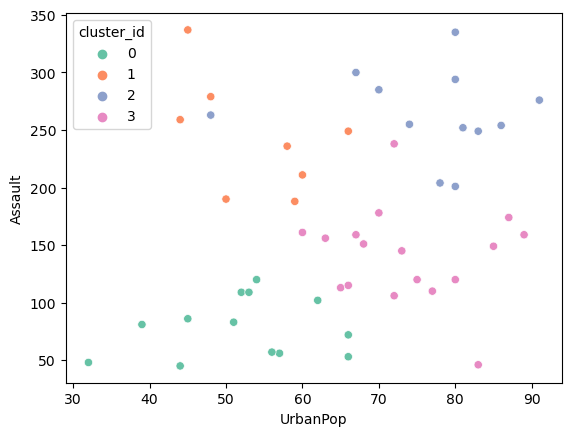

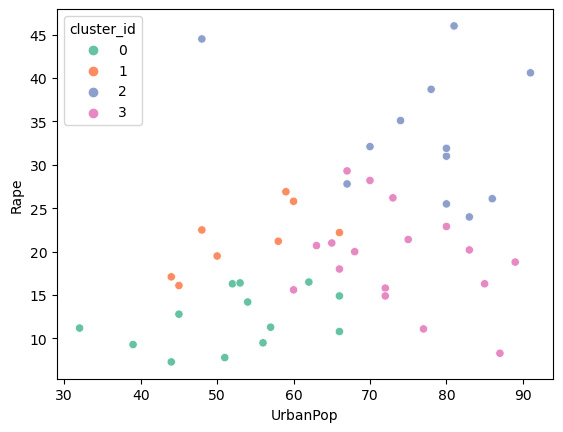

In [38]:
import seaborn as sns

sns.scatterplot(x='UrbanPop', y='Murder', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])                 
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=df, hue = 'cluster_id' ,palette=sns.color_palette("Set2")[:4])              
plt.show()